# Practica 3. Análisis de Señales bioeléctricas para la MUCHACHA :))

## Actividad I


### Seleccionar un registro de los realizados en la Práctica 0

            Seleccionamos el archivo de la medición numero 7 

### Acondicionar los registros

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import hann
from scipy        import fftpack as fft
from scipy.signal import hann
from scipy.signal import chebwin
from scipy.signal import blackman
from scipy        import signal
from scipy.signal import butter
from scipy.signal import filtfilt
from scipy.signal import chirp, hilbert
from scipy.signal import coherence
from scipy.signal import csd

In [6]:
#PSD
def PSD (signal, l=1024, T=0.5, sr=1000):

    N=signal.shape[0]
    psd=[]

    i = 0;
    cont = 0;
    while cont <= N:
        ps=fft.fft(signal[i:i+l])
        psd.append(20*np.log(np.abs(ps)))
        i = i+int((1-T)*l)
        cont = i+l

    psd=np.array(psd[:-1])    
    psd = np.mean(psd,0)

    n = np.size(psd,0)//2

    plt.plot(np.linspace(0,sr/2,n), psd[0:n])
    plt.grid(True)
    return [psd[0:n]]

In [7]:
def m_movil_t (x, N=1024):
    y = []
    for i in range(len(x)//N):
        m = np.mean(x[i*N:i*N+N])
        y.append(x[i*N:i*N+N]-m)
    return (np.array(y).flatten())

In [8]:
def ten_lin (s, t, N=1024):
    y_fin = []
    for i in range(len(s)//N):
        x = []
        x.append(t[i*N:i*N+N])
        x.append(np.ones(len(t[i*N:i*N+N])))
        x = np.array(x).T
        
        y = []
        y.append(s[i*N:i*N+N])
        y = np.array(y).T
        
        w = np.dot(x.T,x)
        w = np.linalg.inv(w)
        w = np.dot(w, x.T)
        w = np.dot(w,y)
        
        yy = w[0]*t[i*N:i*N+N] + w[1]
        yy = s[i*N:i*N+N]-yy
        
        y_fin.append(yy)
        
    return (np.array(y_fin).flatten())

In [9]:
def filt_but(s, w, ord = 5):
    w = w/500
    [b,a] =butter(ord, w, 'low')
    x = filtfilt(b, a, s)
    return (x,b,a)

In [10]:
path = '/Users/Arroy javier/Desktop/MCIB/MCIB-19-P/data/Señales adquirid/'
fname = 'Medi7.txt'

In [11]:
data = np.loadtxt(path+fname, delimiter='\t', dtype='str')

t=data[ : , 0]
SO2=data[:,1]
RESP=data[:,2]
EMG=data[:,3]
PUL=data[:,4]
ECG=data[:,5]

t    = t.astype('float')*60
SO2  = SO2.astype('float')
RESP = RESP.astype('float')
EMG  = EMG.astype('float')
PUL  = PUL.astype('float')
ECG  = ECG.astype('float')

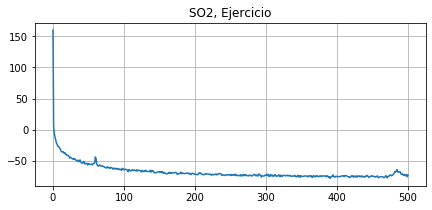

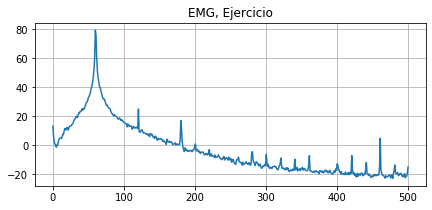

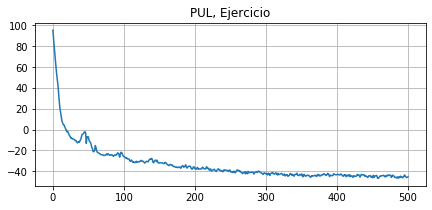

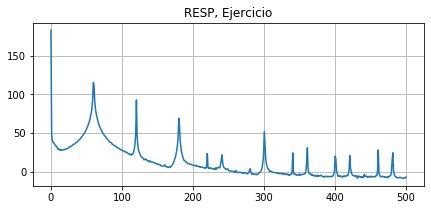

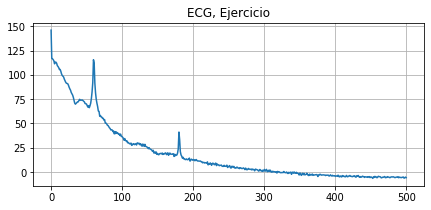

In [12]:
plt.figure(figsize = (7, 3)) 
plt.title("SO2, Ejercicio") 
PS1= PSD (SO2)

plt.figure(figsize = (7, 3)) 
PS2= PSD (EMG)
plt.title("EMG, Ejercicio") 

plt.figure(figsize = (7, 3)) 
PS3= PSD (PUL)
plt.title("PUL, Ejercicio") 

plt.figure(figsize = (7, 3)) 
PS4= PSD (RESP)
plt.title("RESP, Ejercicio") 

plt.figure(figsize = (7, 3)) 
PS5= PSD (ECG)
plt.title("ECG, Ejercicio")
plt.show()

In [13]:
# Filtro notch para quitar el ruido de 60 Hz en algunas señales
[b_n, a_n] = signal.iirnotch(60.0, 70.0, 1000)

# Filtramos las señales
#SO2
[SO2_f, b, a]= filt_but(SO2, 10)

#RESP
[RESP_f, b, a]= filt_but(RESP, 5)

#EMG
EMG_n= filtfilt(b_n, a_n, EMG)
[EMG_f, b, a]= filt_but(EMG_n, 150)

#PUL
[PUL_f, b, a]= filt_but(PUL, 10)

#ECG
ECG_n= filtfilt(b_n, a_n, ECG)
[ECG_f, b, a]= filt_but(ECG_n, 100)
ECG_f = ten_lin (ECG_f, t)



## Graficas de las señales acondicionadas

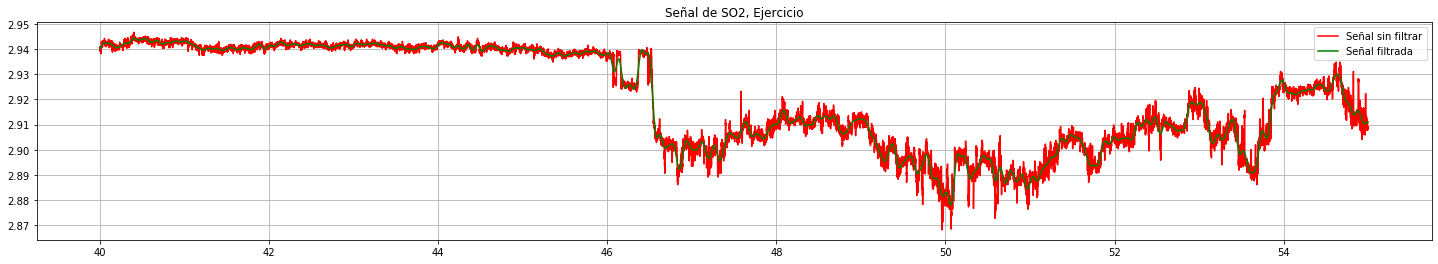

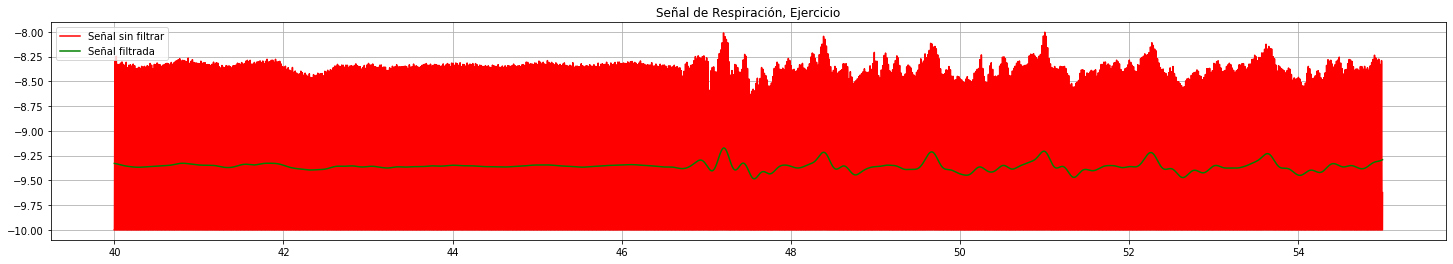

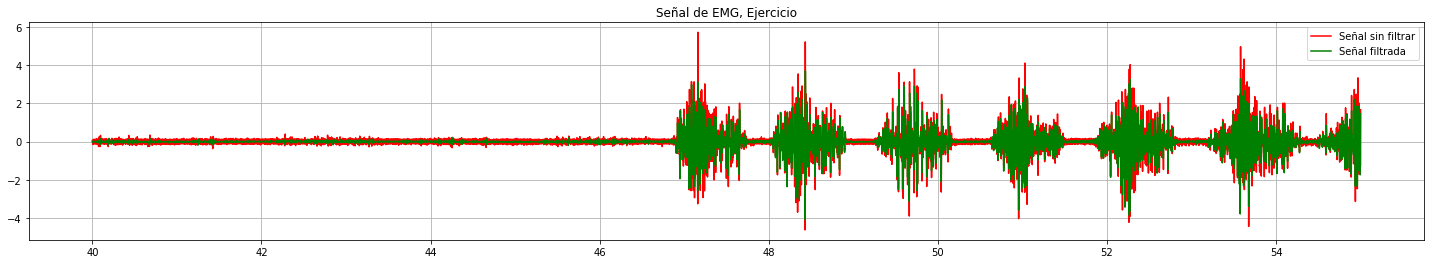

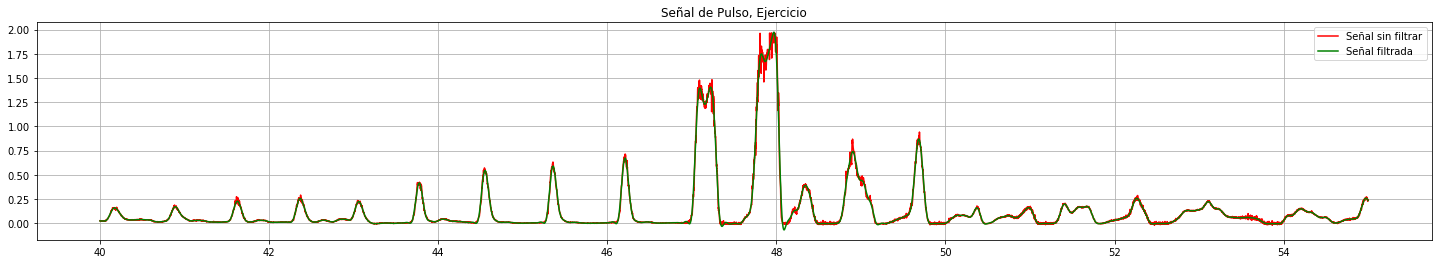

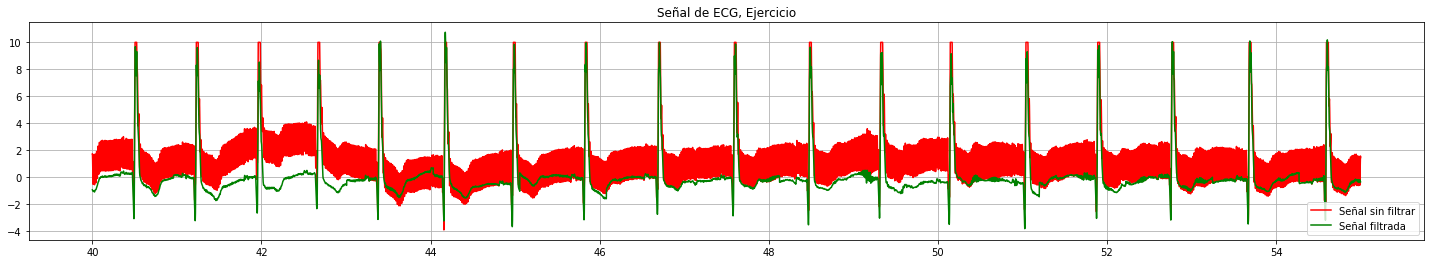

In [14]:
plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], SO2[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], SO2_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de SO2, Ejercicio") 
plt.grid(True)

plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], RESP[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], RESP_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de Respiración, Ejercicio") 
plt.grid(True)

plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], EMG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], EMG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de EMG, Ejercicio") 
plt.grid(True)

plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], PUL[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], PUL_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de Pulso, Ejercicio") 
plt.grid(True)


plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], ECG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], ECG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de ECG, Ejercicio") 
plt.grid(True)
plt.show()

### 2. Segmentar el registro en partes basales y con actividad
       Hay  que consederar 4 momentos en la señal
           1.- Reposo [21-31s]
           2.- Adaptación en pie  [35-45s]
           3.- Actividad ó ejercicio  [56-66s]
           4.- Recuperacion   [78-88s]
       Tomaremos 10s de cada momento

In [15]:

SO2_f_1 = SO2_f[21000:31000]
SO2_f_2 = SO2_f[35000:45000]
SO2_f_3 = SO2_f[56000:66000]
SO2_f_4 = SO2_f[78000:88000]

RESP_f_1 = RESP_f[21000:31000]
RESP_f_2 = RESP_f[35000:45000]
RESP_f_3 = RESP_f[56000:66000]
RESP_f_4 = RESP_f[78000:88000]

EMG_f_1 = EMG_f[21000:31000]
EMG_f_2 = EMG_f[35000:45000]
EMG_f_3 = EMG_f[56000:66000]
EMG_f_4 = EMG_f[78000:88000]

PUL_f_1 = PUL_f[21000:31000]
PUL_f_2 = PUL_f[35000:45000]
PUL_f_3 = PUL_f[56000:66000]
PUL_f_4 = PUL_f[78000:88000]

ECG_f_1 = ECG_f[21000:31000]
ECG_f_2 = ECG_f[35000:45000]
ECG_f_3 = ECG_f[56000:66000]
ECG_f_4 = ECG_f[78000:88000]


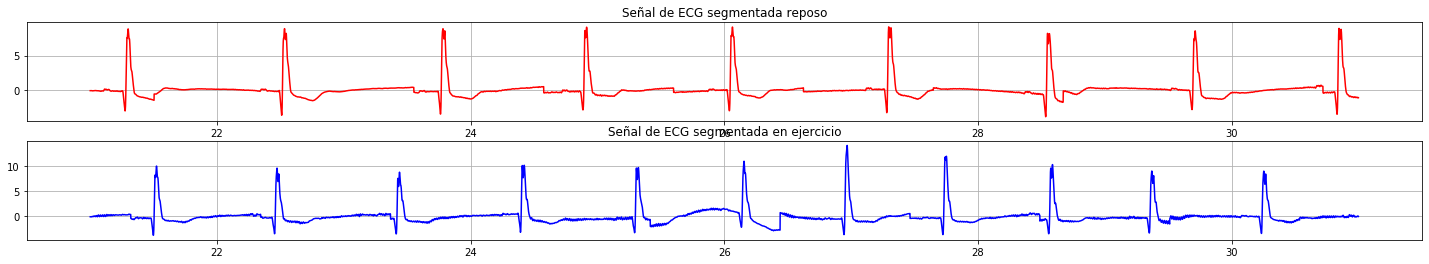

In [16]:
plt.figure(figsize = (25, 4))
plt.subplot(2,1,1)
plt.plot(t[21000:31000], ECG_f[21000:31000],color = 'red')
plt.title("Señal de ECG segmentada reposo") 
plt.grid(True)

plt. subplot(2,1, 2)
plt.plot(t[21000:31000], ECG_f[56000:66000],color = 'blue')
plt.title("Señal de ECG segmentada en ejercicio") 
plt.grid(True)
plt.show()

### Reescalar las senales: 
#### a) Intervalo [-1, 1]


In [14]:
# Creamos una función para reescalar de [-1, 1]
def reescalar_a (x):
    ran = max(x) - min(x)
    new_x = x*2/ran
    new_x = new_x -(max(new_x)-1)
    return (new_x)

## Reescalamiento de las señales
## En reposo

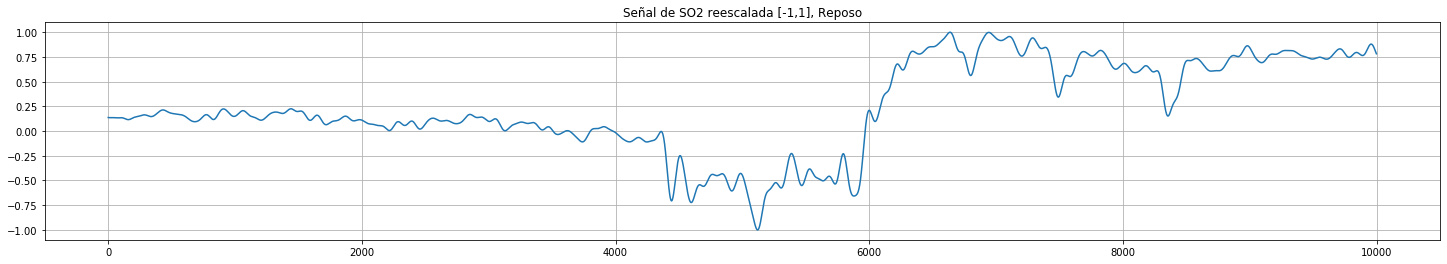

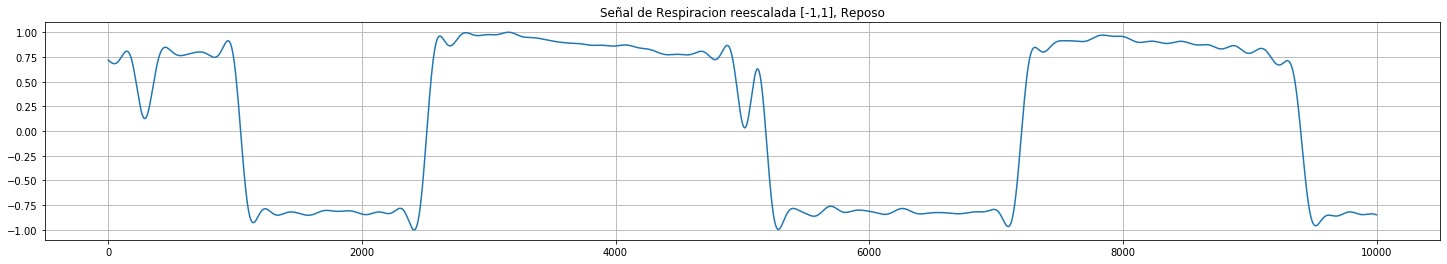

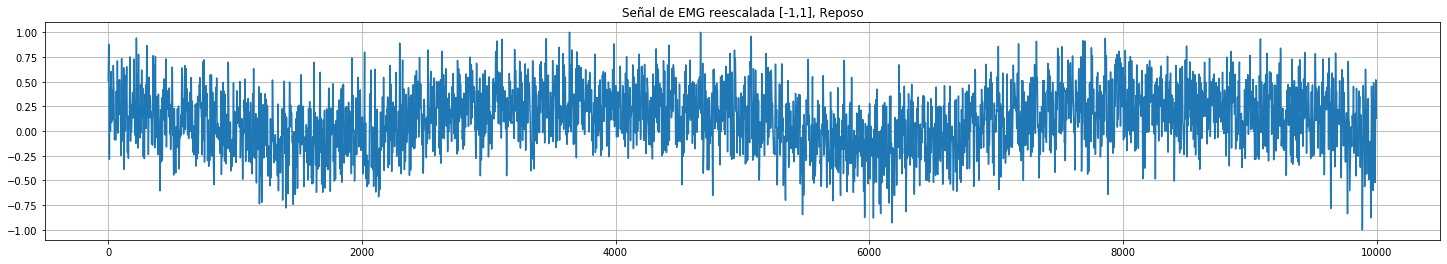

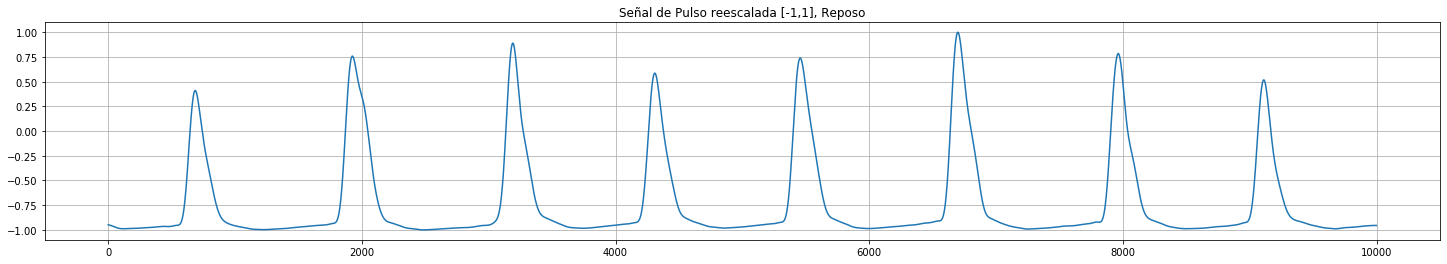

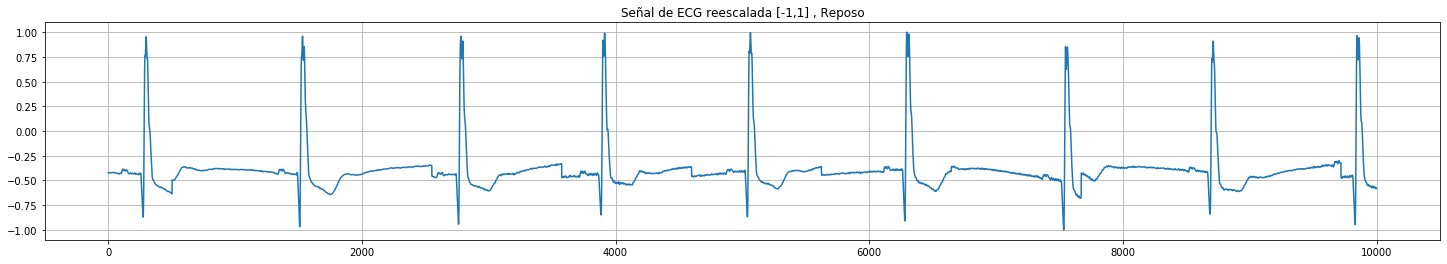

In [16]:
SO2_new1 = reescalar_a (SO2_f_1);
plt.figure(figsize = (25, 4))
plt.plot(SO2_new1)
plt.title("Señal de SO2 reescalada [-1,1], Reposo") 
plt.grid(True)

RESP_new1 = reescalar_a (RESP_f_1);
plt.figure(figsize = (25, 4))
plt.plot(RESP_new1)
plt.title("Señal de Respiracion reescalada [-1,1], Reposo") 
plt.grid(True)

EMG_new1 = reescalar_a (EMG_f_1);
plt.figure(figsize = (25, 4))
plt.plot(EMG_new1)
plt.title("Señal de EMG reescalada [-1,1], Reposo") 
plt.grid(True)

PUL_new1 = reescalar_a (PUL_f_1);
plt.figure(figsize = (25, 4))
plt.plot(PUL_new1)
plt.title("Señal de Pulso reescalada [-1,1], Reposo") 
plt.grid(True)

ECG_new1 = reescalar_a (ECG_f_1);
plt.figure(figsize = (25, 4))
plt.plot(ECG_new1)
plt.title("Señal de ECG reescalada [-1,1] , Reposo") 
plt.grid(True)


## Adaptación

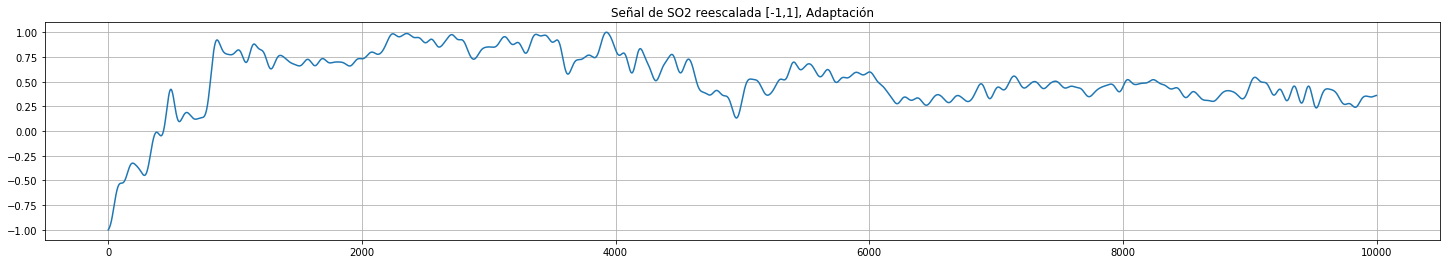

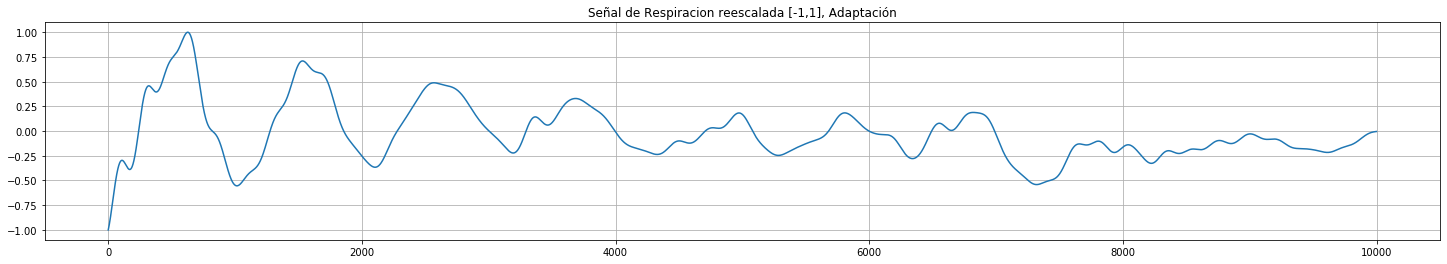

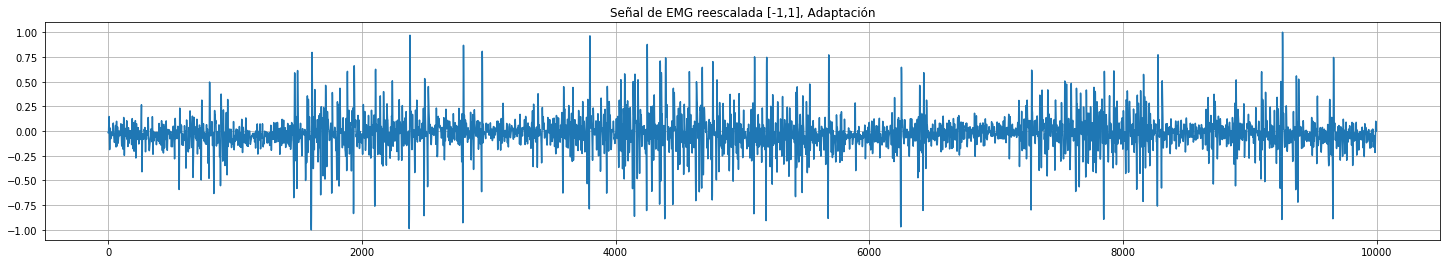

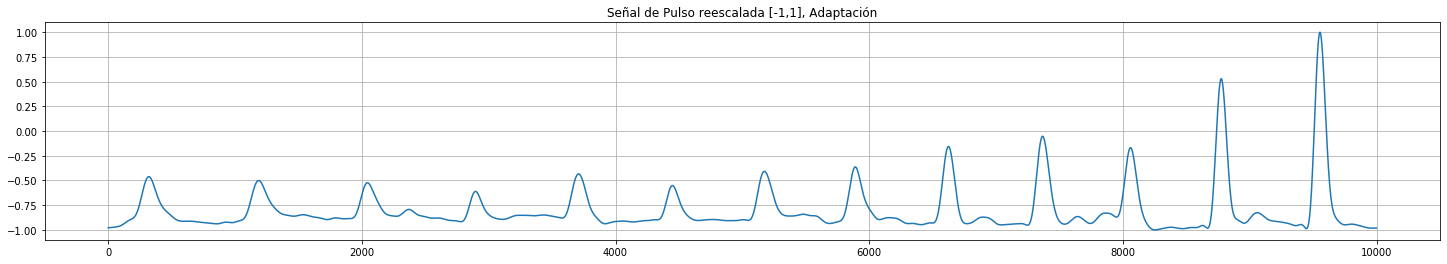

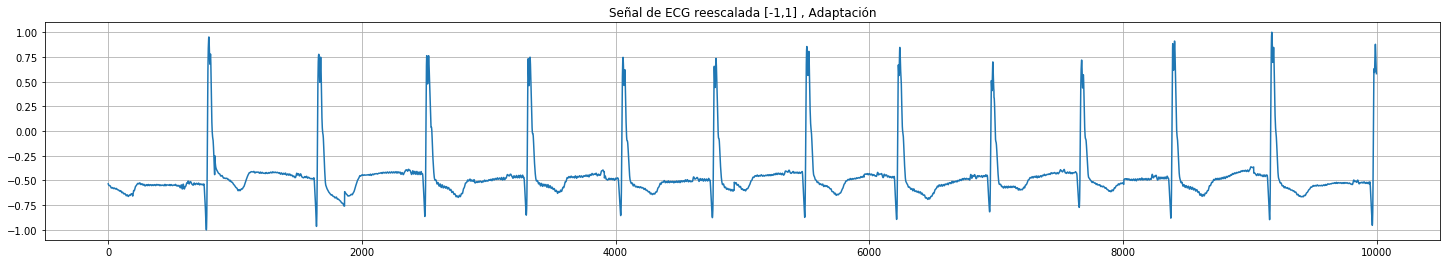

In [17]:
SO2_new2 = reescalar_a (SO2_f_2);
plt.figure(figsize = (25, 4))
plt.plot(SO2_new2)
plt.title("Señal de SO2 reescalada [-1,1], Adaptación") 
plt.grid(True)

RESP_new2 = reescalar_a (RESP_f_2);
plt.figure(figsize = (25, 4))
plt.plot(RESP_new2)
plt.title("Señal de Respiracion reescalada [-1,1], Adaptación") 
plt.grid(True)

EMG_new2 = reescalar_a (EMG_f_2);
plt.figure(figsize = (25, 4))
plt.plot(EMG_new2)
plt.title("Señal de EMG reescalada [-1,1], Adaptación") 
plt.grid(True)

PUL_new2 = reescalar_a (PUL_f_2);
plt.figure(figsize = (25, 4))
plt.plot(PUL_new2)
plt.title("Señal de Pulso reescalada [-1,1], Adaptación") 
plt.grid(True)

ECG_new2 = reescalar_a (ECG_f_2);
plt.figure(figsize = (25, 4))
plt.plot(ECG_new2)
plt.title("Señal de ECG reescalada [-1,1] , Adaptación") 
plt.grid(True)

## Actividad

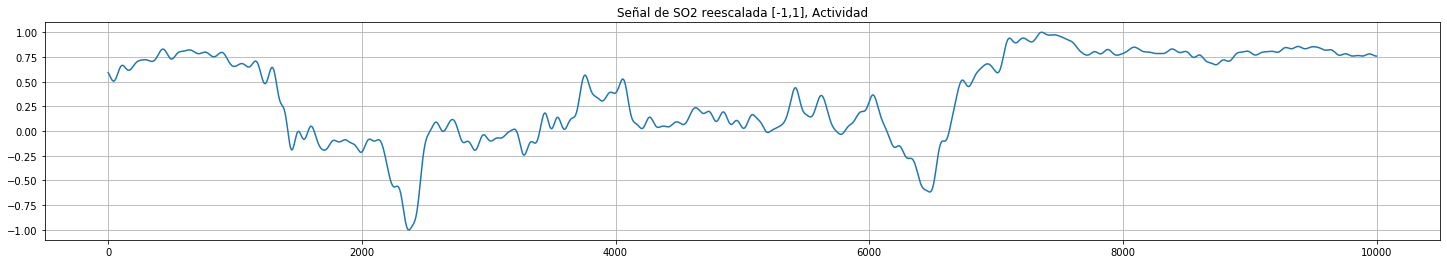

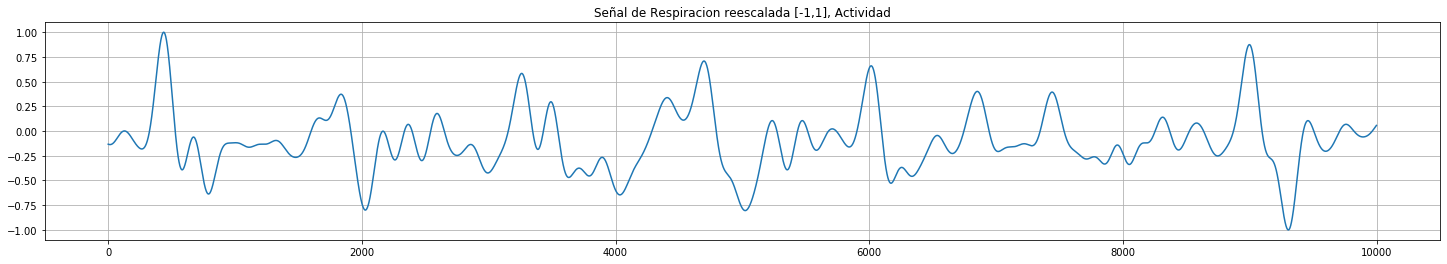

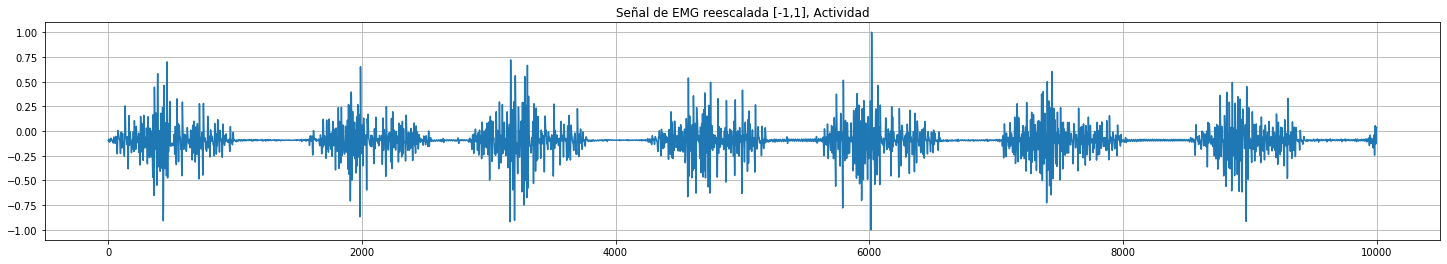

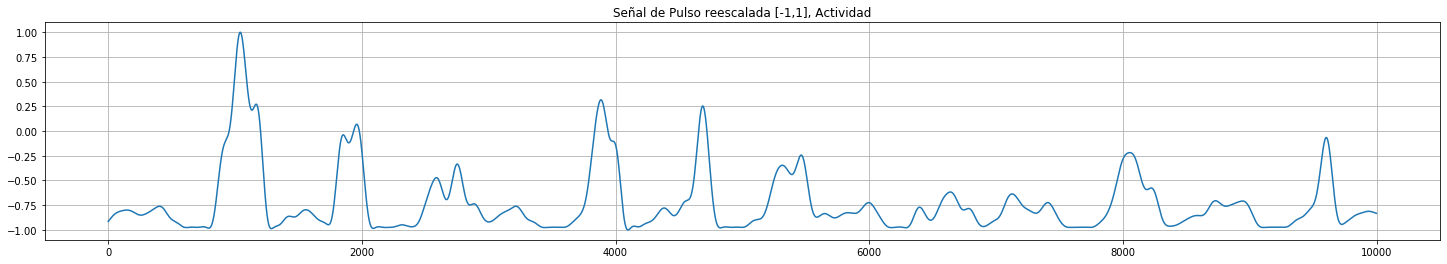

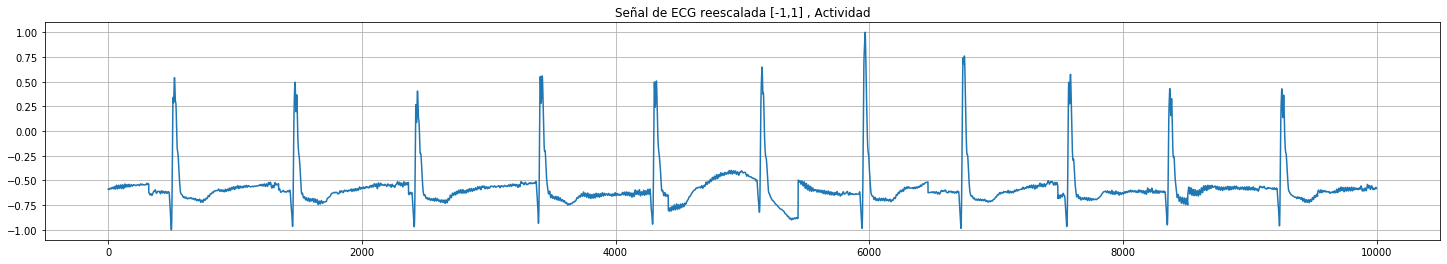

In [18]:
SO2_new3 = reescalar_a (SO2_f_3);
plt.figure(figsize = (25, 4))
plt.plot(SO2_new3)
plt.title("Señal de SO2 reescalada [-1,1], Actividad") 
plt.grid(True)

RESP_new3 = reescalar_a (RESP_f_3);
plt.figure(figsize = (25, 4))
plt.plot(RESP_new3)
plt.title("Señal de Respiracion reescalada [-1,1], Actividad") 
plt.grid(True)

EMG_new3 = reescalar_a (EMG_f_3);
plt.figure(figsize = (25, 4))
plt.plot(EMG_new3)
plt.title("Señal de EMG reescalada [-1,1], Actividad") 
plt.grid(True)

PUL_new3 = reescalar_a (PUL_f_3);
plt.figure(figsize = (25, 4))
plt.plot(PUL_new3)
plt.title("Señal de Pulso reescalada [-1,1], Actividad") 
plt.grid(True)

ECG_new3 = reescalar_a (ECG_f_3);
plt.figure(figsize = (25, 4))
plt.plot(ECG_new3)
plt.title("Señal de ECG reescalada [-1,1] , Actividad") 
plt.grid(True)



## Recuperación

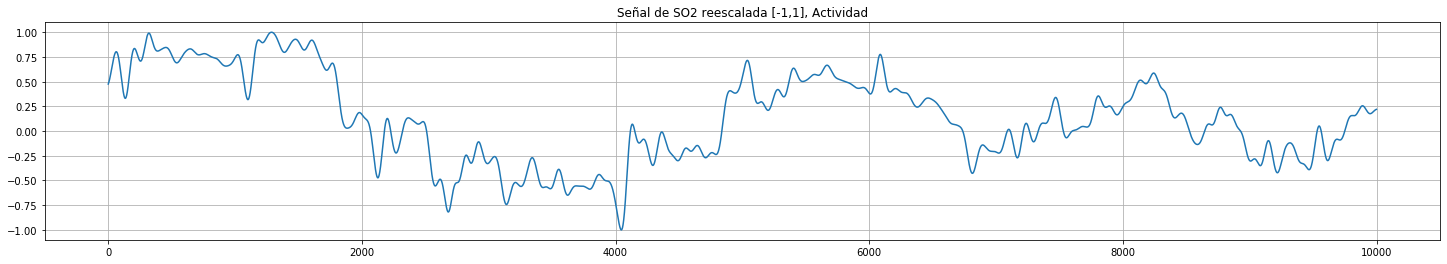

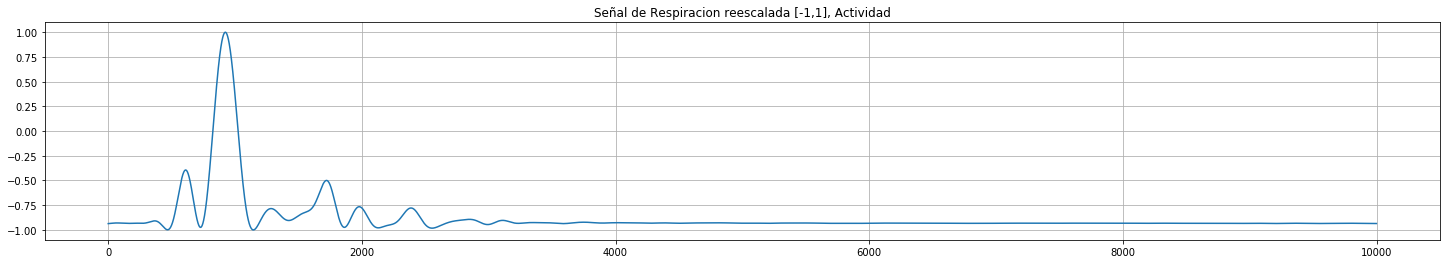

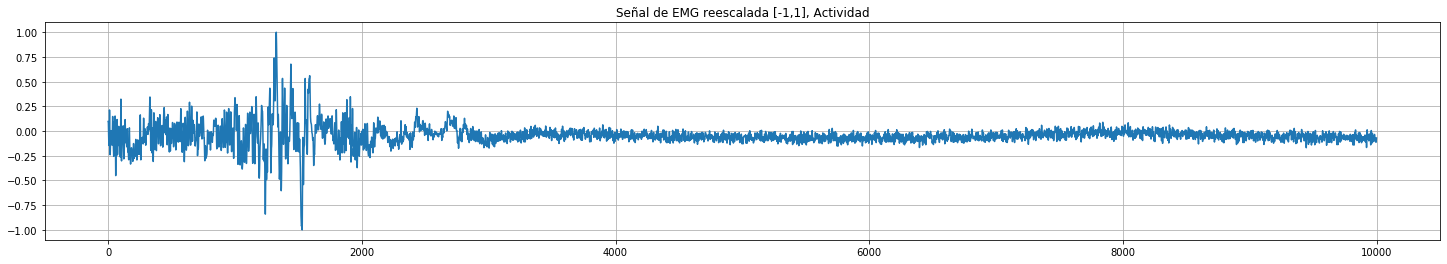

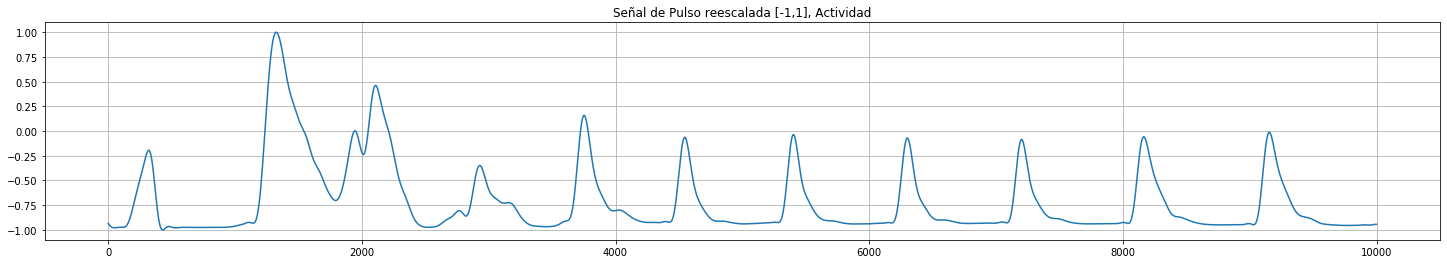

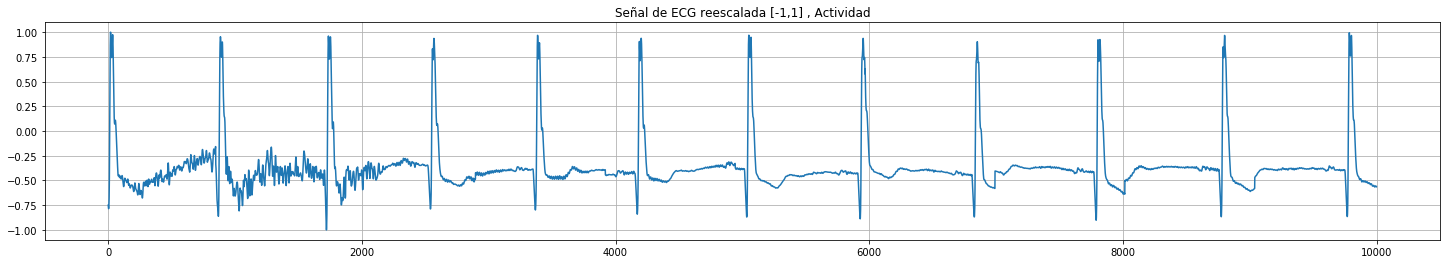

In [19]:
SO2_new4 = reescalar_a (SO2_f_4);
plt.figure(figsize = (25, 4))
plt.plot(SO2_new4)
plt.title("Señal de SO2 reescalada [-1,1], Actividad") 
plt.grid(True)

RESP_new4 = reescalar_a (RESP_f_4);
plt.figure(figsize = (25, 4))
plt.plot(RESP_new4)
plt.title("Señal de Respiracion reescalada [-1,1], Actividad") 
plt.grid(True)

EMG_new4 = reescalar_a (EMG_f_4);
plt.figure(figsize = (25, 4))
plt.plot(EMG_new4)
plt.title("Señal de EMG reescalada [-1,1], Actividad") 
plt.grid(True)

PUL_new4 = reescalar_a (PUL_f_4);
plt.figure(figsize = (25, 4))
plt.plot(PUL_new4)
plt.title("Señal de Pulso reescalada [-1,1], Actividad") 
plt.grid(True)

ECG_new4 = reescalar_a (ECG_f_4);
plt.figure(figsize = (25, 4))
plt.plot(ECG_new4)
plt.title("Señal de ECG reescalada [-1,1] , Actividad") 
plt.grid(True)



## Reescalamiento con z-score

In [20]:
# Creamos una función para z-score
def z_score(x):
    med = np.mean(x)
    s = np.std(x)
    new_x = (x-med)/s 
    return (new_x)

media SO2: -3.3514879760332406e-14 varianza SO2: 1.0


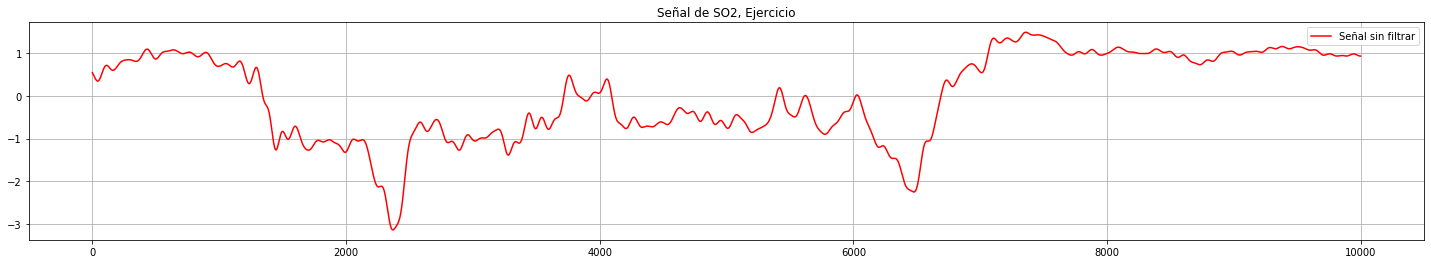

media RESPIRACIÓN: 7.332801033044234e-15 varianza RESPIRACIÓN: 1.0


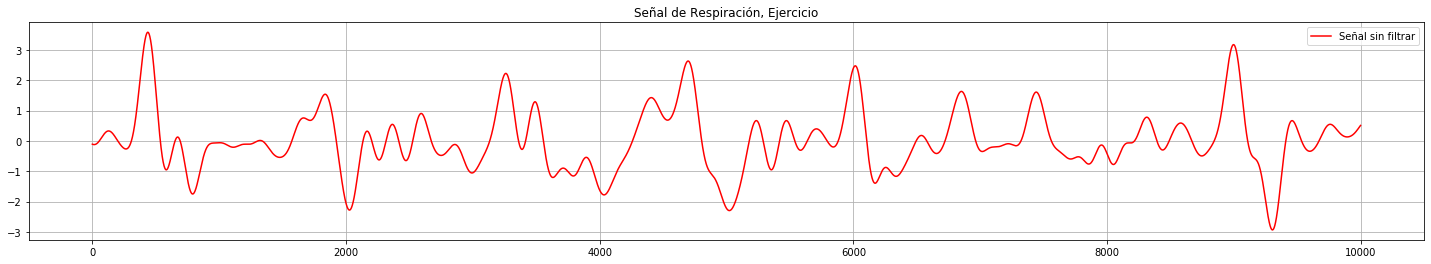

media EMG: 3.68594044175552e-18 varianza EMG: 1.0


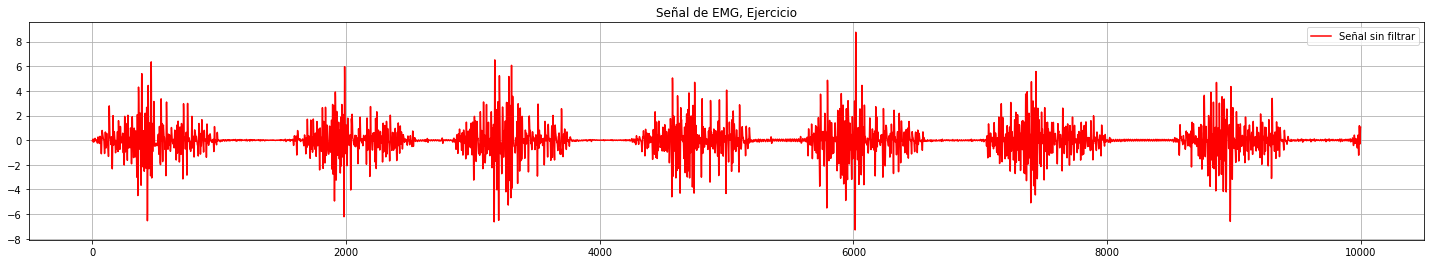

media PULSO: -8.526512829121202e-17 varianza PULSO: 1.0


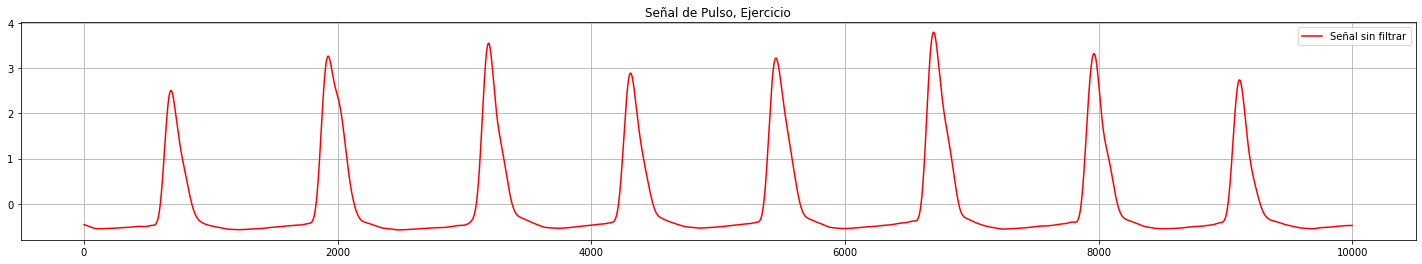

media ECG: -7.105427357601002e-18 varianza ECG: 0.9999999999999999


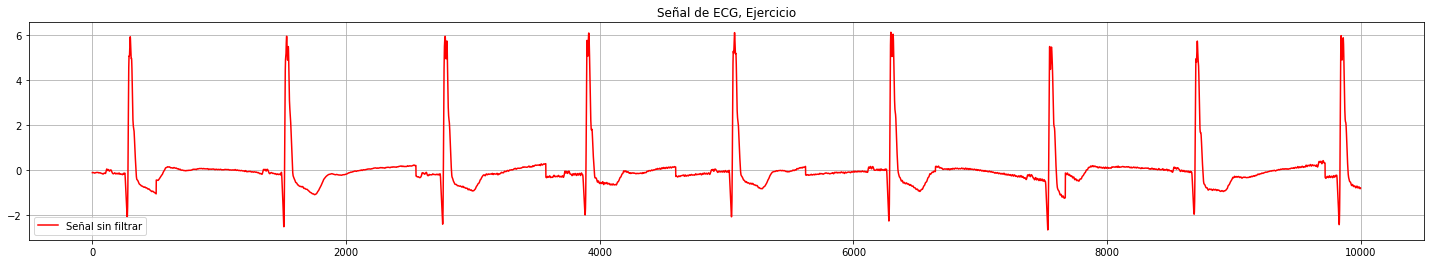

In [21]:
#Señales en actividad reescaladas con z-core
SO2_new = z_score (SO2_f_3);
print('media SO2:', np.mean (SO2_new), 'varianza SO2:', np.std(SO2_new))
plt.figure(figsize = (25, 4))
plt.plot(SO2_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de SO2, Ejercicio") 
plt.grid(True)
plt.show()

RESP_new = z_score (RESP_f_3);
print('media RESPIRACIÓN:', np.mean (RESP_new), 'varianza RESPIRACIÓN:', np.std(RESP_new))
plt.figure(figsize = (25, 4))
plt.plot(RESP_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de Respiración, Ejercicio") 
plt.grid(True)
plt.show()


EMG_new = z_score (EMG_f_3);
print('media EMG:', np.mean (EMG_new), 'varianza EMG:', np.std(EMG_new))
plt.figure(figsize = (25, 4))
plt.plot(EMG_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de EMG, Ejercicio") 
plt.grid(True)
plt.show()


PUL_new = z_score (PUL_f_1);
print('media PULSO:', np.mean (PUL_new), 'varianza PULSO:', np.std(PUL_new))
plt.figure(figsize = (25, 4))
plt.plot(PUL_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de Pulso, Ejercicio") 
plt.grid(True)
plt.show()


ECG_new = z_score (ECG_f_1);
print('media ECG:', np.mean (ECG_new), 'varianza ECG:', np.std(ECG_new))
plt.figure(figsize = (25, 4))
plt.plot(ECG_new,color = 'red', label="Señal sin filtrar")
plt.legend(loc='best')
plt.title("Señal de ECG, Ejercicio") 
plt.grid(True)
plt.show()



## Estimación de la función de densidad de probabilidad

In [22]:
def histogram(s, nbins = 10, width = 0.5, nombre='señal'):
    intervals = np.linspace(s.min(), s.max(), nbins+1)
    left = s[:,np.newaxis]>intervals[:-1][np.newaxis]
    right = s[:,np.newaxis]<intervals[1:][np.newaxis]
    hist = (left*right).sum(axis = 0)
    #plt.figure(figsize = (25, 4))
    plt.bar(intervals[:-1],hist,width, label=nombre)
    plt.legend(loc='best')
    plt.grid(True)
    return(intervals[:-1], hist)

Text(0.5, 1.0, 'Histogramas ECG')

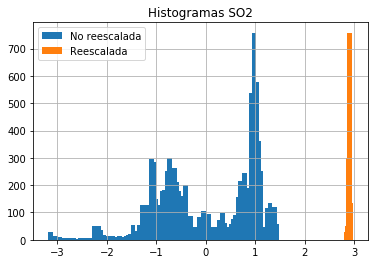

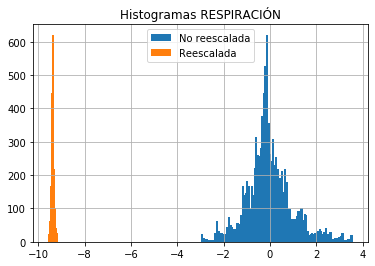

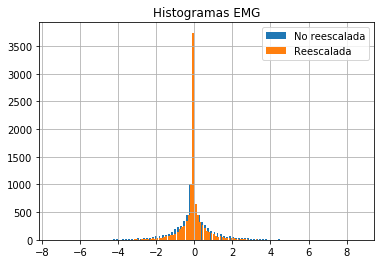

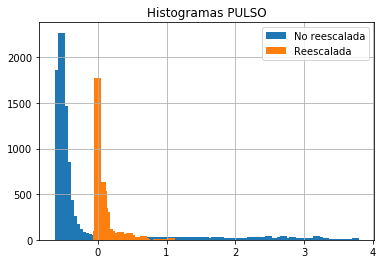

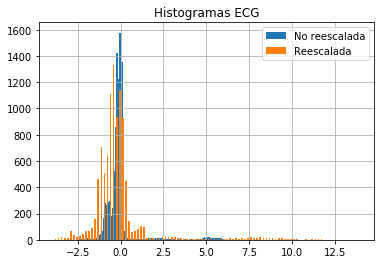

In [23]:
plt.figure()
(a, b) = histogram(SO2_new, 100, 0.1, 'Reescalada')

(a, b) = histogram(SO2_f_3, 100, 0.1, 'No Reescalada')
plt.grid(True)
plt.title('Histogramas SO2')


plt.figure()
(a, b) = histogram(RESP_new, 100, 0.1,'Reescalada')
(a, b) = histogram(RESP_f_3, 100, 0.1,'No Reescalada')
plt.grid(True)
plt.title('Histogramas RESPIRACIÓN')

plt.figure()
(a, b) = histogram(EMG_new, 100, 0.1,'Reescalada')
(a, b) = histogram(EMG_f_3, 100, 0.1,'No Reescalada')
plt.grid(True)
plt.title('Histogramas EMG')

plt.figure()
(a, b) = histogram(PUL_new, 100, 0.1,'Reescalada')
(a, b) = histogram(PUL_f_3, 100, 0.1,'No Reescalada')
plt.grid(True)
plt.title('Histogramas PULSO')

plt.figure()
(a, b) = histogram(ECG_new, 100, 0.1,'Reescalada')
(a, b) = histogram(ECG_f_3, 100, 0.1,'No Reescalada')
plt.grid(True)
plt.title('Histogramas ECG')

## Correlación y Covarianza

## Covarianza 

## Reposo

In [24]:
C1=np.cov ([SO2_f_1, RESP_f_1,    
           EMG_f_1, PUL_f_1,    
           ECG_f_1          ])
print('Matriz de covarianza:') 
print(   C1)

Matriz de covarianza:
[[ 2.69205493e-04 -4.61916506e-05  1.24260153e-06 -9.85628487e-06
   1.85763661e-05]
 [-4.61916506e-05  3.02235356e-03  7.38174324e-05 -2.05244128e-05
  -1.59162317e-03]
 [ 1.24260153e-06  7.38174324e-05  1.18910083e-05 -4.31575647e-06
   1.85555992e-04]
 [-9.85628487e-06 -2.05244128e-05 -4.31575647e-06  2.71799870e-02
  -7.01083744e-03]
 [ 1.85763661e-05 -1.59162317e-03  1.85555992e-04 -7.01083744e-03
   2.26809230e+00]]


## Adaptación

In [25]:
C2=np.cov ([SO2_f_2, RESP_f_2,    
           EMG_f_2, PUL_f_2,    
           ECG_f_2          ])
print('Matriz de covarianza:') 
print(   C2)

Matriz de covarianza:
[[ 1.12553079e-05  1.07933978e-05  4.07781784e-06 -9.29254273e-06
   6.61034320e-04]
 [ 1.07933978e-05  7.35788938e-04 -1.25171737e-05 -1.27282075e-04
   1.29040302e-03]
 [ 4.07781784e-06 -1.25171737e-05  1.15425851e-03 -5.13959809e-06
  -1.65804045e-04]
 [-9.29254273e-06 -1.27282075e-04 -5.13959809e-06  4.44311536e-03
  -5.44083226e-03]
 [ 6.61034320e-04  1.29040302e-03 -1.65804045e-04 -5.44083226e-03
   3.31821368e+00]]


## Actividad

In [26]:
C3=np.cov ([SO2_f_3, RESP_f_3,    
           EMG_f_3, PUL_f_3,    
           ECG_f_3          ])
print('Matriz de covarianza:') 
print(   C3)

Matriz de covarianza:
[[ 2.33751182e-04  5.63254256e-05  1.61080959e-06  2.23581972e-04
  -8.65044121e-04]
 [ 5.63254256e-05  2.65345395e-03  5.87505436e-05  5.59466392e-04
  -1.01949164e-03]
 [ 1.61080959e-06  5.87505436e-05  5.43314966e-01 -5.81997482e-04
  -3.01875202e-03]
 [ 2.23581972e-04  5.59466392e-04 -5.81997482e-04  3.12881579e-02
  -3.09747482e-02]
 [-8.65044121e-04 -1.01949164e-03 -3.01875202e-03 -3.09747482e-02
   3.32017425e+00]]


## Recuperación

In [27]:
C4=np.cov ([SO2_f_4, RESP_f_4,    
           EMG_f_4, PUL_f_4,    
           ECG_f_4          ])
print('Matriz de covarianza:') 
print(   C4)

Matriz de covarianza:
[[ 6.65616421e-05  5.95074578e-03  3.54239122e-07  4.44192793e-04
   3.62622157e-04]
 [ 5.95074578e-03  6.26990409e+00  1.56006500e-03 -5.91091674e-02
   4.22915410e-01]
 [ 3.54239122e-07  1.56006500e-03  1.20710213e-04  2.91563583e-04
   3.48994538e-04]
 [ 4.44192793e-04 -5.91091674e-02  2.91563583e-04  1.41695948e-01
  -5.55553778e-02]
 [ 3.62622157e-04  4.22915410e-01  3.48994538e-04 -5.55553778e-02
   2.94546711e+00]]


## Dispersión de los datos de las señales de ECG y Pulso

(111616,)


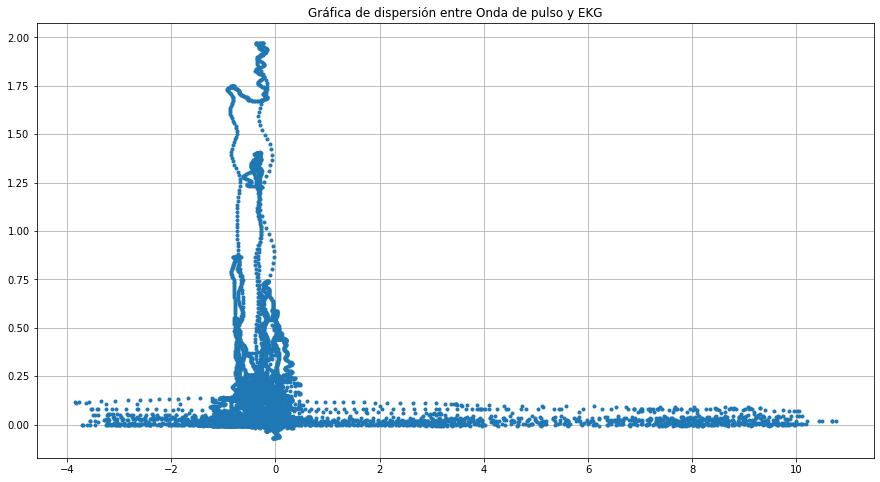

In [28]:
plt.figure( figsize=(15,8) )
plt.title('Gráfica de dispersión entre Onda de pulso y EKG')
plt.plot( ECG_f[40000:55000], PUL_f[40000:55000],'.' )
plt.grid(True)
print(ECG_f.shape)


## Coeficiente de Correlación entre las señales de EKG y Pulso

# Reposo

In [29]:
S1 = np.cov( ECG_f_1, PUL_f_1 )
r1=S1[0,1]/np.product( np.sqrt( S1.diagonal() ) )
print ('Matriz diagonal:')
print (S1)
print ('Coeficiente de Correlación:',r1)
       

Matriz diagonal:
[[ 2.2680923  -0.00701084]
 [-0.00701084  0.02717999]]
Coeficiente de Correlación: -0.02823676323539365


# Adaptación 

In [30]:
S2 = np.cov( ECG_f_2, PUL_f_2 )
r2=S2[0,1]/np.product( np.sqrt( S2.diagonal() ) )
print ('Matriz diagonal:')
print (S2)
print ('Coeficiente de Correlación:',r2)

Matriz diagonal:
[[ 3.31821368 -0.00544083]
 [-0.00544083  0.00444312]]
Coeficiente de Correlación: -0.04480942465243418


# Actividad

In [31]:
S3 = np.cov( ECG_f_3, PUL_f_3 )
r3=S3[0,1]/np.product( np.sqrt( S3.diagonal() ) )
print ('Matriz diagonal:')
print (S3)
print ('Coeficiente de Correlación:',r3)

Matriz diagonal:
[[ 3.32017425 -0.03097475]
 [-0.03097475  0.03128816]]
Coeficiente de Correlación: -0.09610308915486417


# Recuperación

In [32]:
S4 = np.cov( ECG_f_4, PUL_f_4 )
r4=S4[0,1]/np.product( np.sqrt( S4.diagonal() ) )
print ('Matriz diagonal:')
print (S4)
print ('Coeficiente de Correlación:',r4)

Matriz diagonal:
[[ 2.94546711 -0.05555538]
 [-0.05555538  0.14169595]]
Coeficiente de Correlación: -0.0859944258005634


## ACTIVIDAD 2

# Coherencia

In [33]:
def coherencia (signal1, signal2, l=512, T=0.5, sr=1000, col = 'green', nombre="Coherencia", w = 0):
    
    N=signal1.shape[0]
    psd1=[]
    psd2=[]
    cpsd=[]
    if w == 0:
        w= hann(l)

    i = 0
    cont = 0
    while cont <= N:
        ps1=fft.fft(signal1[i:i+l]*w)
        psd1.append(ps1*ps1.conj())
        
        ps2=fft.fft(signal2[i:i+l]*w)
        psd2.append(ps2*ps2.conj())
        
        cpsd.append(ps1*ps2.conj())
        
        i = i+int((1-T)*l)
        cont = i+l
    
    psd1 = np.array(psd1[:-1])    
    psd1 = np.mean(psd1,0)
    
    psd2 = np.array(psd2[:-1])    
    psd2 = np.mean(psd2,0)
    
    cpsd = np.array(cpsd[:-1])    
    cpsd = np.mean(cpsd,0)
    
    coh = cpsd**2/(psd1*psd2)
    
    n = np.size(coh,0)//2
    
    plt.title('Coherencia')
    plt.plot(np.linspace(0,sr/2,n), abs(coh[0:n]), color = col, label = nombre, linewidth=3)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Coherencia')
    plt.grid(True)
    return [abs(coh[0:n])]


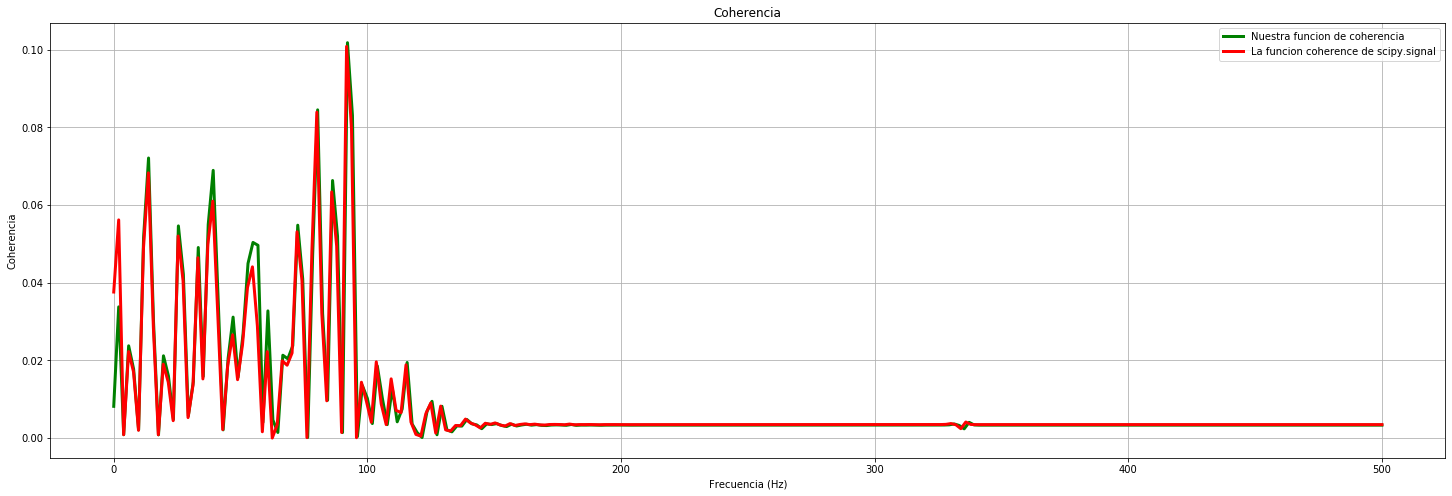

In [34]:
# Para comprobar nuestra función de coherencia calculamos la coherencia con nustra funcion y con la funcion 
# coherence de scipy.signal y se puede observar que son muy parecidas
plt.figure(figsize = (25, 8))
coh = coherencia(ECG_f_3, ECG_f_1, 512, col = 'green', nombre="Nuestra funcion de coherencia")
[f, coh1] = coherence(ECG_f_3, ECG_f_1, fs = 1000, nperseg=512)
plt.plot(f, coh1,color = 'red', label="La funcion coherence de scipy.signal", linewidth=3)
plt.legend(loc='best')
plt.show()

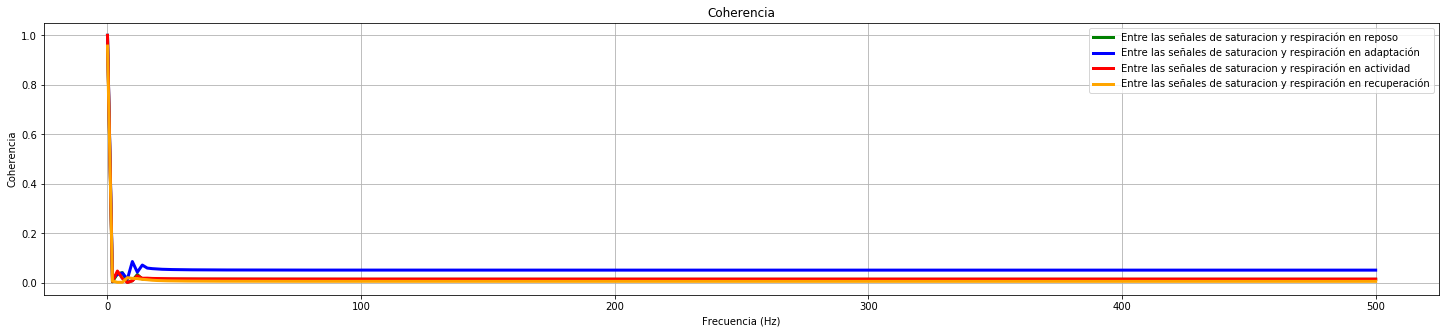

In [35]:
# Calculamos la coherencia entre las señales de SO2 y respiración
plt.figure(figsize = (25, 5))
Coh_S_R_1 = coherencia(SO2_f_1, RESP_f_1, 512, col = 'green', nombre = "Entre las señales de saturacion y respiración en reposo", w = 1)
Coh_S_R_2 = coherencia(SO2_f_2, RESP_f_2, 512, col = 'blue', nombre = "Entre las señales de saturacion y respiración en adaptación", w = 1)
Coh_S_R_3 = coherencia(SO2_f_3, RESP_f_3, 512, col = 'red', nombre = "Entre las señales de saturacion y respiración en actividad", w = 1)
Coh_S_R_4 = coherencia(SO2_f_4, RESP_f_4, 512, col = 'orange', nombre = "Entre las señales de saturacion y respiración en recuperación", w = 1)
plt.legend(loc='best')
plt.grid(True)
plt.show()

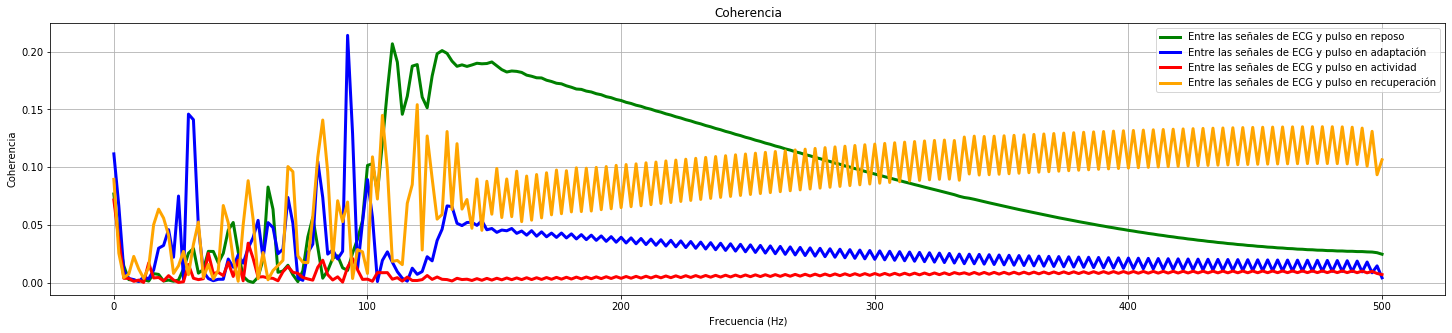

In [36]:
# Calculamos la coherencia entre las señales de ECG y pulso
plt.figure(figsize = (25, 5))
Coh_E_P_1 = coherencia(ECG_f_1, PUL_f_1, 512, col = 'green', nombre = "Entre las señales de ECG y pulso en reposo")
Coh_E_P_2 = coherencia(ECG_f_2, PUL_f_2, 512, col = 'blue', nombre = "Entre las señales de ECG y pulso en adaptación")
Coh_E_P_3 = coherencia(ECG_f_3, PUL_f_3, 512, col = 'red', nombre = "Entre las señales de ECG y pulso en actividad")
Coh_E_P_4 = coherencia(ECG_f_4, PUL_f_4, 512, col = 'orange', nombre = "Entre las señales de ECG y pulso en recuperación")

plt.legend(loc='best')
plt.grid(True)
plt.show()

## ACTIVIDAD 3
# Utilizando un detector de picos, estime la frecuencia cardiaca latido a latido apartir del EKG y la onda del pulso

numero de picos EKG= 115
numero de picos PULSO= 115


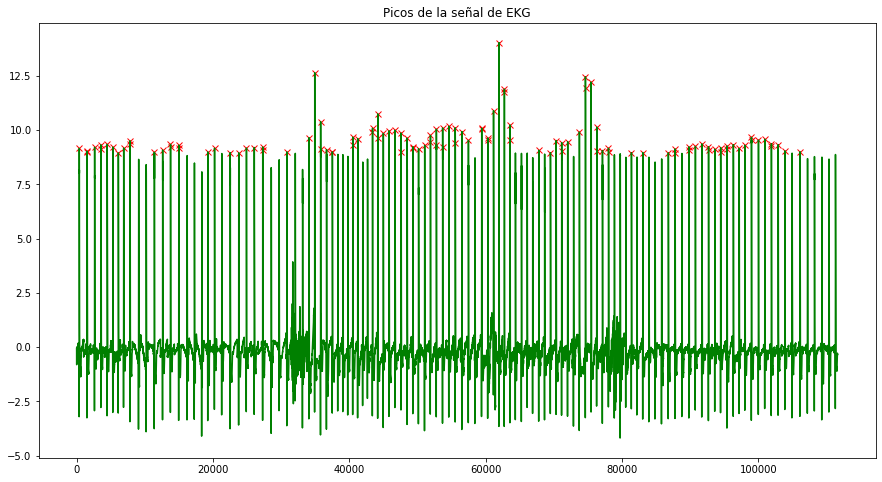

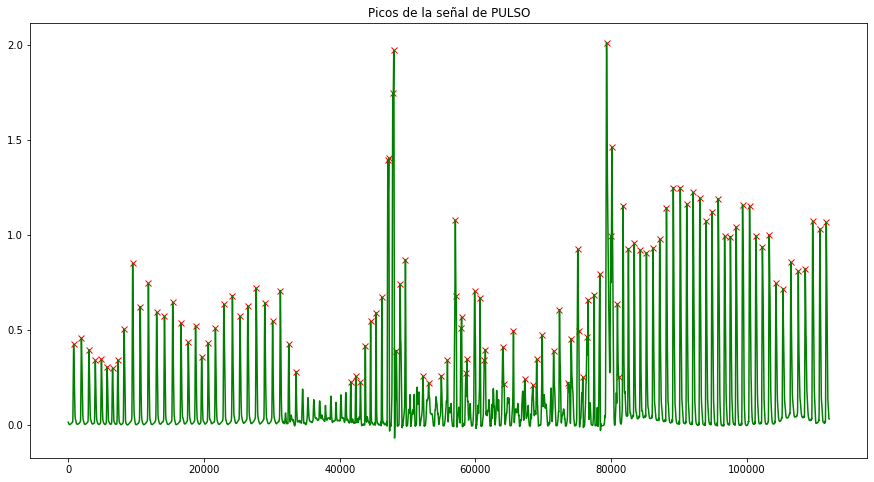

In [40]:
from scipy.signal import find_peaks
peaks_ecg, _ = find_peaks(ECG_f,8.949)
np.diff(peaks_ecg)
plt.figure(figsize=(15,8))
plt.plot(peaks_ecg, ECG_f[peaks_ecg], "x",color='red')
plt.plot(ECG_f, color='green')
plt.title('Picos de la señal de EKG')

print ('numero de picos EKG=',peaks_ecg.shape[0])


peaks_pul, _ = find_peaks(PUL_f,0.2)
np.diff(peaks_pul)
plt.figure(figsize=(15,8))
plt.plot(peaks_pul, PUL_f[peaks_pul], "x",color='red')
plt.plot(PUL_f, color='green')
plt.title('Picos de la señal de PULSO')

print ('numero de picos PULSO=', peaks_pul.shape[0])

In [41]:
##Diferencias
dp_ecg=np.diff(peaks_ecg)
dp_ecg=dp_ecg/60
print('DIFERENCIAS EKG',dp_ecg)

dp_pul=np.diff(peaks_pul)
dp_pul=dp_pul/60
print('DIFERENCIAS PULSO',dp_pul)


DIFERENCIAS EKG [18.9         0.25       18.33333333 15.55        0.25       15.
 13.9        13.31666667 13.05       15.53333333  0.28333333 59.15
 20.28333333 19.16666667  0.26666667 19.98333333  0.25       70.81666667
 16.4        38.31666667 20.81666667 18.88333333 19.15       20.55
  0.28333333 58.88333333 54.13333333 13.88333333 14.43333333  0.21666667
 14.23333333 14.18333333  0.25       49.7         0.26666667 11.95
 35.86666667  0.25       12.76666667  0.23333333 13.38333333 14.16666667
 14.43333333 14.78333333  0.21666667 14.73333333 13.9         0.25
 13.61666667 14.98333333 13.93333333  0.23333333 14.45        0.23333333
 15.05        0.23333333 15.03333333 15.55        0.25       16.13333333
 15.85       32.21666667  0.26666667 14.73333333  0.26666667 13.88333333
 13.55       12.88333333  0.15       13.71666667  0.23333333 70.25
 28.31666667 14.16666667 13.33333333  0.26666667 14.46666667 28.6
 14.76666667  0.18333333 13.95       13.38333333  0.21666667 13.9
 14.71666667  

## Coeficiente de correlacion con funcion 

In [43]:
#Coeficiente de PEARSON Correlacion con funcion
from scipy.stats import pearsonr
pearsonr(  dp_ecg, dp_pul )

(-0.0016165384211831544, 0.9863810099212621)

In [44]:
S2 = np.cov( dp_ecg, dp_pul )
r2=S2[0,1]/np.product( np.sqrt( S2.diagonal() ) )
print('Coeficiente de correlación:',r2)

Coeficiente de correlación: -0.001616538421183152


## Existe correlacion entre dichas frecuencias?
# No existe correlación entre las frecuencias ya que el coeficiente de correlacion tiende a ser negativo y se aleja de 1

## Utilice la transformada de Hilbert y la regla trapezoidal para obtener el área bajo la curva del EMG que es un estimador de las fibras reclutadas en una contraccion (recuerde que el EMG está segmentado en periodos basales y de actividad)

In [17]:
##Envolventes
HRESP = hilbert(RESP_f_1)
evRESP = np.abs(HRESP)

HEMG = hilbert(EMG_f_3)
evEMG = np.abs(HEMG)


HPUL = hilbert(PUL_f[: 12000])
evPUL = np.abs(HPUL)

NameError: name 'evEMG' is not defined

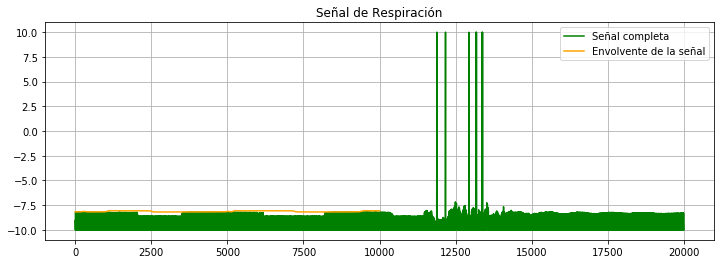

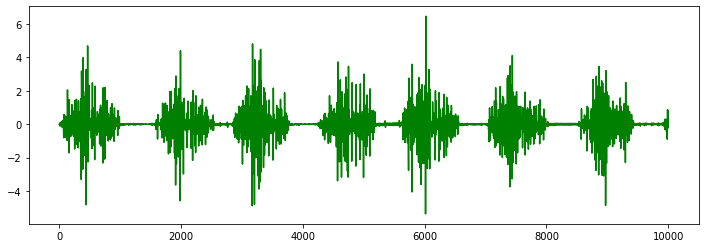

In [19]:
evRESP = np.abs(-HRESP)
evRESP=(evRESP-17.5)
plt.figure( figsize=(12,4) )
plt.plot( RESP[20000:40000], color ='green' ,label="Señal completa")
plt.plot(   evRESP, color ='orange',label="Envolvente de la señal")
plt.legend(loc='best')
plt.title('Señal de Respiración')
plt.grid(True)


plt.figure( figsize=(12,4) )
plt.plot( EMG_f_3, color ='green',label="Señal completa" )
plt.plot(   evEMG, color ='orange',label="Envolvente de la señal" )
plt.legend(loc='best')
plt.title('Señal de EMG')
plt.grid(True)


plt.figure( figsize=(12,4) )
plt.plot( PUL[: 12000], color ='green',label="Señal completa" )
plt.plot(   evPUL[: 12000], color ='orange',label="Envolvente de la señal" )
plt.legend(loc='best')
plt.title('Señal de pulso')
plt.grid(True)




## Regla trapezoidal y sumas de Riemman 

# Respiración

In [47]:
sr=1000
Suma_R=evRESP[:1200].sum()/t[:1200]
Regla_T=0.5*( evRESP[:1200-1] + evRESP[1:1200] ).sum()/t[:1200]
print(Regla_T)
Suma_R=(sum(Suma_R))
Regla_T=sum(Regla_T)
print(Suma_R,Regla_T)


[           -inf -9.77651246e+06 -4.88827090e+06 ... -8.16752884e+03
 -8.16069758e+03 -8.15391854e+03]
-inf -inf


C:\Users\Arroy javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Arroy javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


   ## EMG
   

In [48]:
sr=1000
Suma_R=evEMG[:1200].sum()/t[:1200]
Regla_T=0.5*( evEMG[:1200-1] + evEMG[1:1200] ).sum()/t[:1200]
print(Regla_T)
Suma_R=(sum(Suma_R))
Regla_T=sum(Regla_T)
print(Suma_R,Regla_T)


[           inf 8.83942537e+05 4.41972595e+05 ... 7.38466420e+02
 7.37848773e+02 7.37235846e+02]
inf inf


C:\Users\Arroy javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Arroy javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


## Pulso

In [49]:
sr=1000
Suma_R=evPUL[:1200].sum()/t[:1200]
Regla_T=0.5*( evPUL[:1200-1] + evPUL[1:1200] ).sum()/t[:1200]
print(Suma_R)
print(Regla_T)
Suma_R=(sum(Suma_R))
Regla_T=sum(Regla_T)
print(Suma_R,Regla_T)


[           inf 1.81581126e+05 9.07908354e+04 ... 1.51697151e+02
 1.51570272e+02 1.51444364e+02]
[           inf 1.81376855e+05 9.06886996e+04 ... 1.51526498e+02
 1.51399762e+02 1.51273995e+02]
inf inf


C:\Users\Arroy javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Arroy javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


## Existe correlación entre las frecuencias cardiacas latido a latido y el área bajo la curva del EMG?

NO existe correlacion ya que los valores de correlacion están muy dispersos, esto deido a varios factores, 
la metrica de medicion es muy corta, es decir, las señales tienen poca duración, aunque elegimos una señal 
que se ve bien, contiene artefactos creados por el movimineto del sujeto lo que pérjudica el analaisis tanto 
en el area bajo la curva como en la deteccion de picos, esto provoca que varias mediciones se queden fuera 
de los datos considerados para analizar 